Let's explore the influence of female life expectancy alone on the fertility rates.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Read the data
FertilityRate = pd.read_csv("FertilityRate.csv")
LifeExp_F = pd.read_csv("LifeExp_Female.csv")

Fertility = FertilityRate.loc[4:, FertilityRate.columns[6:62]].values
LifeExpectancy = LifeExp_F.loc[4:, LifeExp_F.columns[6:62]].values

Countries = FertilityRate['Data Source'][4:].values.tolist()
Years = FertilityRate.loc[3, FertilityRate.columns[6:62]].values.astype(int)

In [3]:
#Do not include nan data points
not_nan_1 = ~np.isnan(LifeExpectancy)
not_nan_2 = ~np.isnan(Fertility)
not_nan = np.logical_and(not_nan_1, not_nan_2)

#Life expectancy is a predictor for ferility  
X = LifeExpectancy[not_nan]
Y = Fertility[not_nan]
Y = np.reshape(Y, (Y.size,1))

#Calculate and save mean values and std before rescaling
Xorg_mean = np.mean(X)
Xorg_std = np.std(X)
Yorg_mean = np.mean(Y)
Yorg_std = np.std(Y)

#Rescale the data
X = (X-Xorg_mean)/Xorg_std
Y = (Y-Yorg_mean)/Yorg_std

I will build two models, one is linear model and the other hyperbolic tangens model.

In [4]:
#TANH MODEL

#Create data array with tanh(LifeExpectancy) and a Constant
Xtanh = np.tanh(X)
Xtanh_plus = sm.add_constant(Xtanh)

#Build a model with tanh(LifeExpectancy) as predictor
mod = sm.OLS(Y, Xtanh_plus).fit() # Ordinary Least Squares
predictions = mod.predict(Xtanh_plus) 
b, a = mod.params
BIC = mod.bic
R2 = mod.rsquared

print ("Tanh model has R-squared of " +str(R2.astype('float16')) + " and BIC of " +str(BIC.astype('float16')) )

#Build a model with LifeExpectancy as predictor
mod_lin = sm.OLS(Y, sm.add_constant(X)).fit() # Ordinary Least Squares
BIC_lin = mod_lin.bic
R2_lin = mod_lin.rsquared

print ("Linear model has R-squared of " +str(R2_lin.astype('float16')) + " and BIC of " +str(BIC_lin.astype('float16')) )

Tanh model has R-squared of 0.81 and BIC of 15896.0
Linear model has R-squared of 0.766 and BIC of 18720.0


We see that Tanh model is better fit to the data than a linear model. That means that a model assuming that many children an average woman will have depends on her life expectancy as hyperbolic tangens can explain 81% variation of the fertility data. As a comparison a full model with female life expectancy and literacy as well as the percentage of urban population explained 84.7% variation of the fertility data. 
However, that model had 31% less of the data points due to unavailability of the literacy and percentage of urban population data.  

In [5]:
#BACK TO ORIGINAL VALUES
Xorg = X*Xorg_std + Xorg_mean
Yorg = Y*Yorg_std + Yorg_mean

X_range = np.arange(np.min(X), np.max(X), np.std(X)/10)
Y_Pred = np.multiply(a, np.tanh(X_range)) + b
Yorg_Pred = Y_Pred*Yorg_std + Yorg_mean

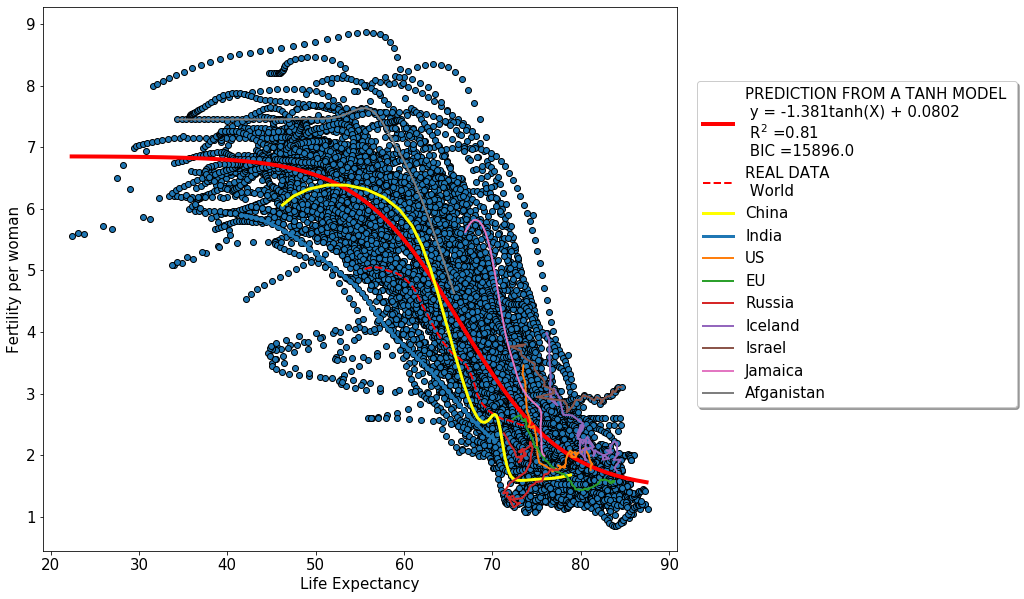

In [19]:
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = 15
ax = plt.subplot(121)
plt.scatter(Xorg,Yorg, edgecolors = 'black')
ax.plot(X_range*Xorg_std + Xorg_mean, Yorg_Pred, c = 'red',  lw = 4, label = "PREDICTION FROM A TANH MODEL \n y = " + str(a.astype('float16')) +"tanh(X) + " + str(b.astype('float16')) + " \n R$^2$ =" + str(R2.astype('float16')) + "\n BIC =" + str(BIC.astype('float16')))
plt.xlabel("Life Expectancy")
plt.ylabel("Fertility per woman")
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.00), shadow=False, ncol=2)

Index_World = Countries.index("World")
Index_EU = Countries.index("European Union")
Index_US = Countries.index("United States")
Index_Russia = Countries.index("Russian Federation")
Index_China = Countries.index("China")
Index_India = Countries.index("India")
Index_India = Countries.index("India")
Index_Iceland = Countries.index("Iceland")
Index_Israel = Countries.index("Israel")
Index_Jamaica = Countries.index("Jamaica")
Index_Afg = Countries.index("Afghanistan")
Index_Romania = Countries.index("Romania")

ax.plot(LifeExpectancy[Index_World, :], Fertility[Index_World, :], label = "REAL DATA \n World", c = 'r', lw = 3, ls = '--')
ax.plot(LifeExpectancy[Index_China, :], Fertility[Index_China, :], label = "China", c = 'yellow', lw = 3)
ax.plot(LifeExpectancy[Index_India, :], Fertility[Index_India, :], label = "India", lw = 3)
ax.plot(LifeExpectancy[Index_US, :], Fertility[Index_US, :], label = "US", lw = 2)
ax.plot(LifeExpectancy[Index_EU, :], Fertility[Index_EU, :], label = "EU", lw = 2)
ax.plot(LifeExpectancy[Index_Russia, :], Fertility[Index_Russia, :], label = "Russia", lw = 2)
ax.plot(LifeExpectancy[Index_Iceland, :], Fertility[Index_Iceland, :], label = "Iceland", lw = 2)
ax.plot(LifeExpectancy[Index_Israel, :], Fertility[Index_Israel, :], label = "Israel", lw = 2)
ax.plot(LifeExpectancy[Index_Jamaica, :], Fertility[Index_Jamaica, :], label = "Jamaica", lw = 2)
ax.plot(LifeExpectancy[Index_Afg, :], Fertility[Index_Afg, :], label = "Afganistan", lw = 2)
ax.legend(loc='lower left', bbox_to_anchor=(1.02, 0.25), shadow=True, ncol=1)

We see that, for example, India was well below average for all time points while women in Iceland always had more children than the model would predict from their life expectancy. 
Many people have impression that fertility rates in China were very large before they introduced one child policy. 
Let's see just how much policies of a country influence the fertility rates. As example I took two opposite policies, namely China's policy to reduce fertility and Ceaușescu's attempt to increase the Romanian population.

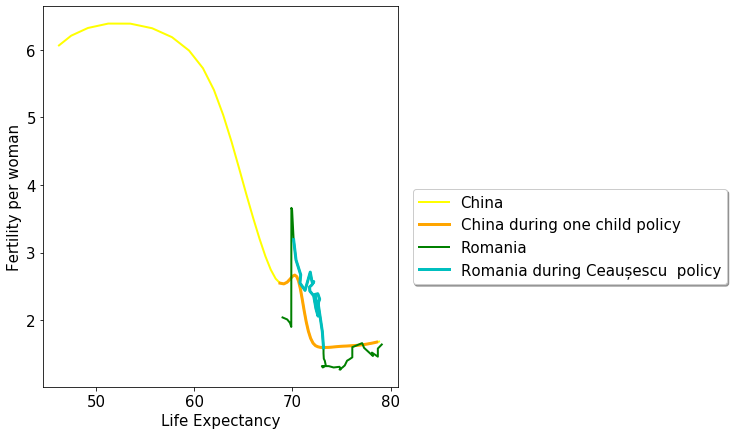

In [27]:
plt.figure(figsize = (14, 7))

ax = plt.subplot(121)
ax.plot(LifeExpectancy[Index_China, :], Fertility[Index_China, :], label = "China", c = 'yellow', lw = 2)
ax.plot(LifeExpectancy[Index_China, 1979-1960:2015-1960], Fertility[Index_China, 1979-1960:2015-1960], label = "China during one child policy", c = 'orange', lw = 3)
ax.plot(LifeExpectancy[Index_Romania, :], Fertility[Index_Romania, :], label = "Romania", c = 'g', lw = 2)
ax.plot(LifeExpectancy[Index_Romania, 1967-1960:1990-1960], Fertility[Index_Romania, 1967-1960:1990-1960], label = "Romania during Ceaușescu  policy", c = 'c', lw = 3)
plt.xlabel("Life Expectancy")
plt.ylabel("Fertility per woman")
ax.legend(loc='lower left', bbox_to_anchor=(1.02, 0.25), shadow=True, ncol=1)

We see that if anything was achieved than it was the opposite :)